<a href="https://colab.research.google.com/github/bkcrcb/codsoft/blob/main/task1/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

%matplotlib inline

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Codsoft/titanic/tested.csv')

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
Ti_df = df.drop(['PassengerId','Name','Ticket','Fare','Cabin'],axis =1)
Ti_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,34.5,0,0,Q
1,1,3,female,47.0,1,0,S
2,0,2,male,62.0,0,0,Q
3,0,3,male,27.0,0,0,S
4,1,3,female,22.0,1,1,S
...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,S
414,1,1,female,39.0,0,0,C
415,0,3,male,38.5,0,0,S
416,0,3,male,NaN,0,0,S


In [ ]:
Ti_df['Age']= Ti_df['Age'].fillna(Ti_df['Age'].mean())
Ti_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,34.50000,0,0,Q
1,1,3,female,47.00000,1,0,S
2,0,2,male,62.00000,0,0,Q
3,0,3,male,27.00000,0,0,S
4,1,3,female,22.00000,1,1,S
...,...,...,...,...,...,...,...
413,0,3,male,30.27259,0,0,S
414,1,1,female,39.00000,0,0,C
415,0,3,male,38.50000,0,0,S
416,0,3,male,30.27259,0,0,S


In [ ]:
Ti_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [ ]:
Ti_df.describe()

,Survived,Pclass,Age,SibSp,Parch
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.363636,2.265550,30.272590,0.447368,0.392344
std,0.481622,0.841838,12.634534,0.896760,0.981429
min,0.000000,1.000000,0.170000,0.000000,0.000000
25%,0.000000,1.000000,23.000000,0.000000,0.000000
50%,0.000000,3.000000,30.272590,0.000000,0.000000
75%,1.000000,3.000000,35.750000,1.000000,0.000000
max,1.000000,3.000000,76.000000,8.000000,9.000000


<Axes: xlabel='Sex', ylabel='count'>

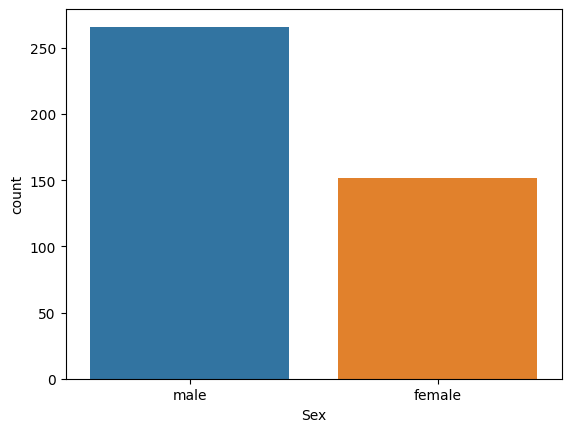

In [ ]:
sns.countplot(x ='Sex', data = Ti_df)

<Axes: xlabel='Survived', ylabel='count'>

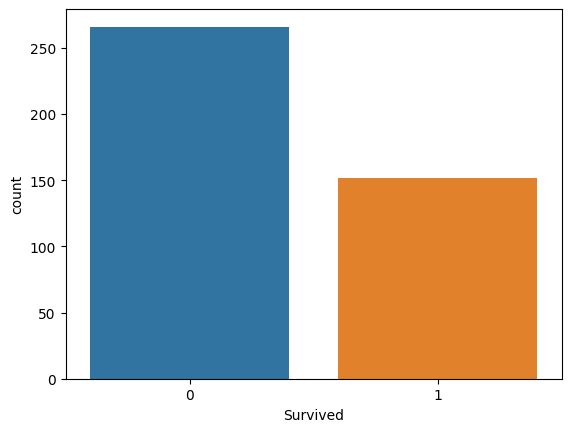

In [ ]:
sns.countplot(x ='Survived', data = Ti_df)

<Axes: xlabel='Survived', ylabel='count'>

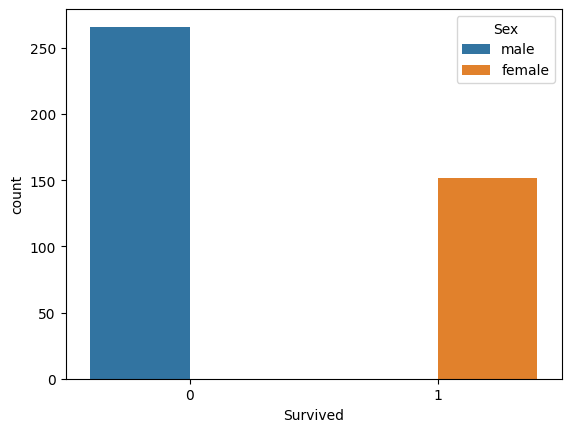

In [ ]:
sns.countplot(x ='Survived', data = Ti_df, hue = 'Sex')

<Axes: xlabel='Survived', ylabel='count'>

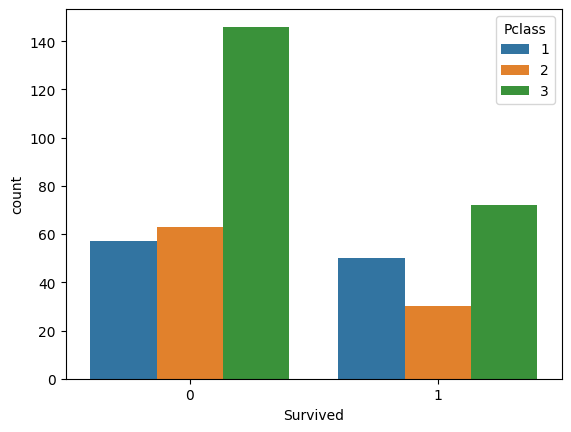

In [ ]:
sns.countplot(x ='Survived', data = Ti_df, hue = 'Pclass')

<Axes: xlabel='Sex', ylabel='count'>

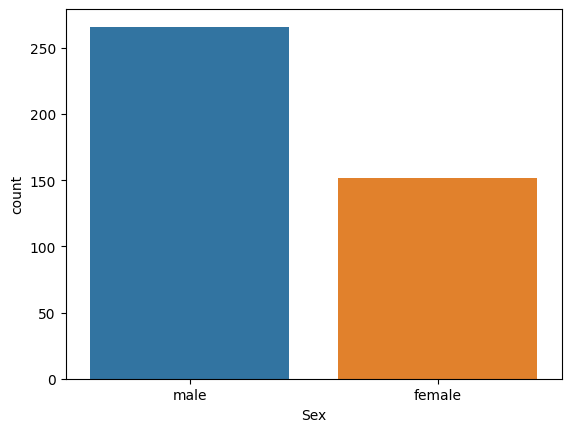

In [ ]:
sns.countplot(x ='Sex', data = Ti_df)

<ipython-input-22-e52131d030d6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Ti_df['Age'],kde=False,color='red')


<Axes: xlabel='Age'>

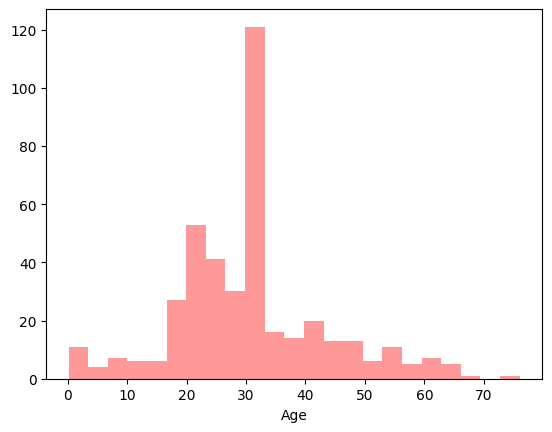

In [ ]:

sns.distplot(Ti_df['Age'],kde=False,color='red')

<ipython-input-24-c6511c69d8d1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Ti_df.corr(),annot=True, cmap='coolwarm')


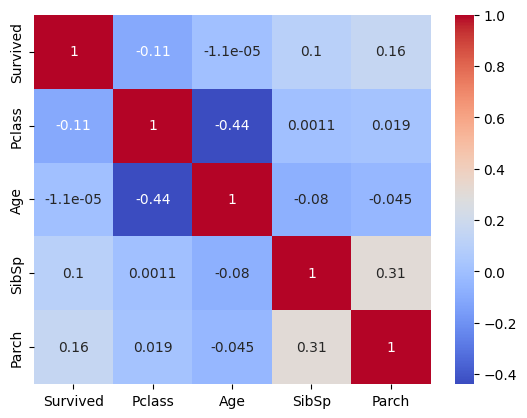

<Figure size 1000x1000 with 0 Axes>

In [ ]:
sns.heatmap(Ti_df.corr(),annot=True, cmap='coolwarm')
plt.figure(figsize= (10,10))
plt.show()

In [ ]:
Ti_df['Sex'] = Ti_df['Sex'].map({'male':0,'female':1})

In [ ]:
Ti_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,34.50000,0,0,Q
1,1,3,1,47.00000,1,0,S
2,0,2,0,62.00000,0,0,Q
3,0,3,0,27.00000,0,0,S
4,1,3,1,22.00000,1,1,S
...,...,...,...,...,...,...,...
413,0,3,0,30.27259,0,0,S
414,1,1,1,39.00000,0,0,C
415,0,3,0,38.50000,0,0,S
416,0,3,0,30.27259,0,0,S


In [ ]:
ec = Ti_df['Embarked'].value_counts()
ec.index

Index(['S', 'C', 'Q'], dtype='object')

In [ ]:
most_occuring_embarked = ec.index[0]
Ti_df['Embarked'] = Ti_df['Embarked'].fillna(most_occuring_embarked)

emb = pd.get_dummies(Ti_df['Embarked'],drop_first = True, prefix = 'Embarked')
emb

,Embarked_Q,Embarked_S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1
...,...,...
413,0,1
414,0,0
415,0,1
416,0,1


In [ ]:
Ti_df = pd.concat([Ti_df,emb],axis = 1 )
Ti_df.drop('Embarked',axis = 1, inplace = True)
Ti_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked_Q,Embarked_S
0,0,3,0,34.50000,0,0,1,0
1,1,3,1,47.00000,1,0,0,1
2,0,2,0,62.00000,0,0,1,0
3,0,3,0,27.00000,0,0,0,1
4,1,3,1,22.00000,1,1,0,1
...,...,...,...,...,...,...,...,...
413,0,3,0,30.27259,0,0,0,1
414,1,1,1,39.00000,0,0,0,0
415,0,3,0,38.50000,0,0,0,1
416,0,3,0,30.27259,0,0,0,1


In [ ]:
y = Ti_df['Survived']
X = Ti_df.drop('Survived',axis =1)

In [ ]:
X

,Pclass,Sex,Age,SibSp,Parch,Embarked_Q,Embarked_S
0,3,0,34.50000,0,0,1,0
1,3,1,47.00000,1,0,0,1
2,2,0,62.00000,0,0,1,0
3,3,0,27.00000,0,0,0,1
4,3,1,22.00000,1,1,0,1
...,...,...,...,...,...,...,...
413,3,0,30.27259,0,0,0,1
414,1,1,39.00000,0,0,0,0
415,3,0,38.50000,0,0,0,1
416,3,0,30.27259,0,0,0,1


In [ ]:
y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
logreg = LogisticRegression()

In [ ]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
pred = logreg.predict(X_test)
pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0])

In [ ]:
accuracy = accuracy_score(y_test,pred) * 100
accuracy

100.0

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
pred2 = rfc.predict(X_test)
accuracy_score(y_test,pred2) * 100

100.0

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
pred3 = gbc.predict(X_test)
accuracy_score(y_test,pred3) * 100

100.0